In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate as interp
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# from pycaret.regression import setup,compare_models
pd.set_option('display.max_columns', 500)

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [244]:
#We have to visulize different datasets
dengue_train_prelim_0 = pd.read_csv("dengue_features_train.csv")
dengue_test = pd.read_csv("dengue_features_test.csv")
labels_train = pd.read_csv("dengue_labels_train.csv")

In [342]:
dengue_test.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [245]:
dengue_train_prelim_0.isna().sum(axis=1).value_counts()
dengue_train_prelim = pd.concat([dengue_train_prelim_0,labels_train['total_cases']],axis=1)

In [311]:
dengue_train_prelim.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [312]:
missing_values_in_rows = dengue_train_prelim.isna().sum(axis=1)
indexes = missing_values_in_rows.sort_values(ascending=False) >= 16
train_1 = dengue_train_prelim.loc[indexes == False,:]
train_1.isna().sum(axis=1).sort_values(ascending=False).value_counts()

0    1199
1     178
2      37
4      20
3      12
Name: count, dtype: int64

### Now have removed rows with more than 15 null values (N:10)

In [248]:
sj_train = train_1[train_1['city'] == "sj"]
iq_train = train_1[train_1['city'] == "iq"]

In [249]:
print(sj_train.shape)
print(iq_train.shape)

(930, 25)
(516, 25)


In [250]:
## Finding the null columns: 
## Iq

iq_train.isna().sum()
iq_miss_cols = ["station_avg_temp_c", "station_diur_temp_rng_c","station_max_temp_c","station_min_temp_c","station_precip_mm"]                        

In [251]:
iq_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [348]:
weekly_means = iq_train.groupby('weekofyear')[iq_miss_cols].transform('mean')

# Fill the missing values with the computed means
for col in iq_miss_cols:
    iq_train[col].fillna(weekly_means[col], inplace=True)

/var/folders/d7/z23sxpv11lv4f4ly5v7wgs580000gn/T/ipykernel_3049/1222553479.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iq_train[col].fillna(weekly_means[col], inplace=True)


In [349]:
weekly_means

,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,26.568750,9.865625,32.711111,19.74,49.130000
937,26.587963,9.938889,33.044444,20.94,60.777778
938,26.923148,10.605556,33.044444,20.37,35.510000
939,26.634259,10.579630,32.733333,19.50,27.460000
940,26.343333,10.051167,32.780000,19.92,34.320000
...,...,...,...,...,...
1451,27.570000,10.230000,33.760000,21.71,85.910000
1452,26.726042,10.084792,33.540000,20.63,81.770000
1453,26.806667,9.373333,32.850000,20.84,51.811111
1454,26.849630,9.985741,33.066667,20.61,44.540000


In [350]:
iq_train.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  1
ndvi_nw                                  1
ndvi_se                                  1
ndvi_sw                                  1
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [351]:
iq_train.isna().sum(axis=1).value_counts()

0    515
4      1
Name: count, dtype: int64

In [352]:
## Removing the row with 4 missing ndvi data 

iq_train_final = iq_train.loc[(iq_train.isna().sum(axis=1) > 1) == False,:]
iq_train_final.isna().sum()
iq_train.shape

(516, 25)

### IQ city has no null values 

In [353]:
## Null values is sj (As percentage)
sj_train.isna().sum()/sj_train.shape[1]

city                                     0.00
year                                     0.00
weekofyear                               0.00
week_start_date                          0.00
ndvi_ne                                  0.00
ndvi_nw                                  0.00
ndvi_se                                  0.00
ndvi_sw                                  0.00
precipitation_amt_mm                     0.12
reanalysis_air_temp_k                    0.00
reanalysis_avg_temp_k                    0.00
reanalysis_dew_point_temp_k              0.00
reanalysis_max_air_temp_k                0.00
reanalysis_min_air_temp_k                0.00
reanalysis_precip_amt_kg_per_m2          0.00
reanalysis_relative_humidity_percent     0.00
reanalysis_sat_precip_amt_mm             0.12
reanalysis_specific_humidity_g_per_kg    0.00
reanalysis_tdtr_k                        0.00
station_avg_temp_c                       0.00
station_diur_temp_rng_c                  0.00
station_max_temp_c                

In [258]:
sj_train['ndvi_ne'].tail().sort_values()

933   -0.15520
932   -0.03800
935   -0.03700
934    0.00180
931    0.07785
Name: ndvi_ne, dtype: float64

In [259]:
dengue_test.isna().sum(axis=1).value_counts()

0     353
1      47
3       8
2       6
16      1
20      1
Name: count, dtype: int64

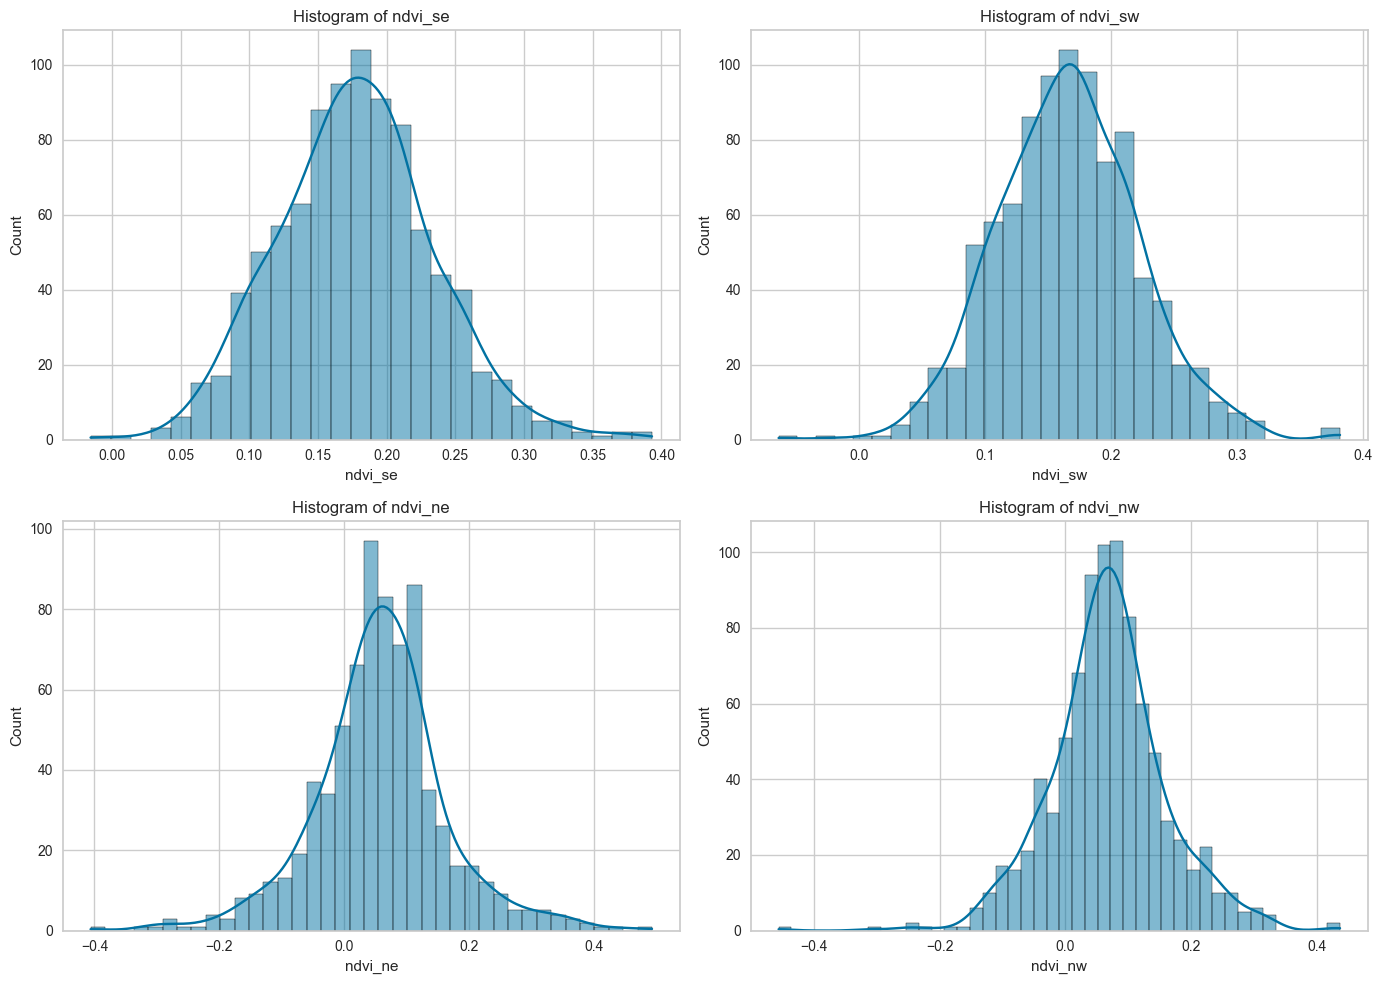

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

# Create a figure instance and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the array of axes
axs = axs.flatten()

# Loop over each feature and plot a histogram
for i, feature in enumerate(features):
    sns.histplot(data=sj_train, x=feature, kde=True, ax=axs[i])
    axs[i].set_title(f'Histogram of {feature}')

# Adjust the layout
plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

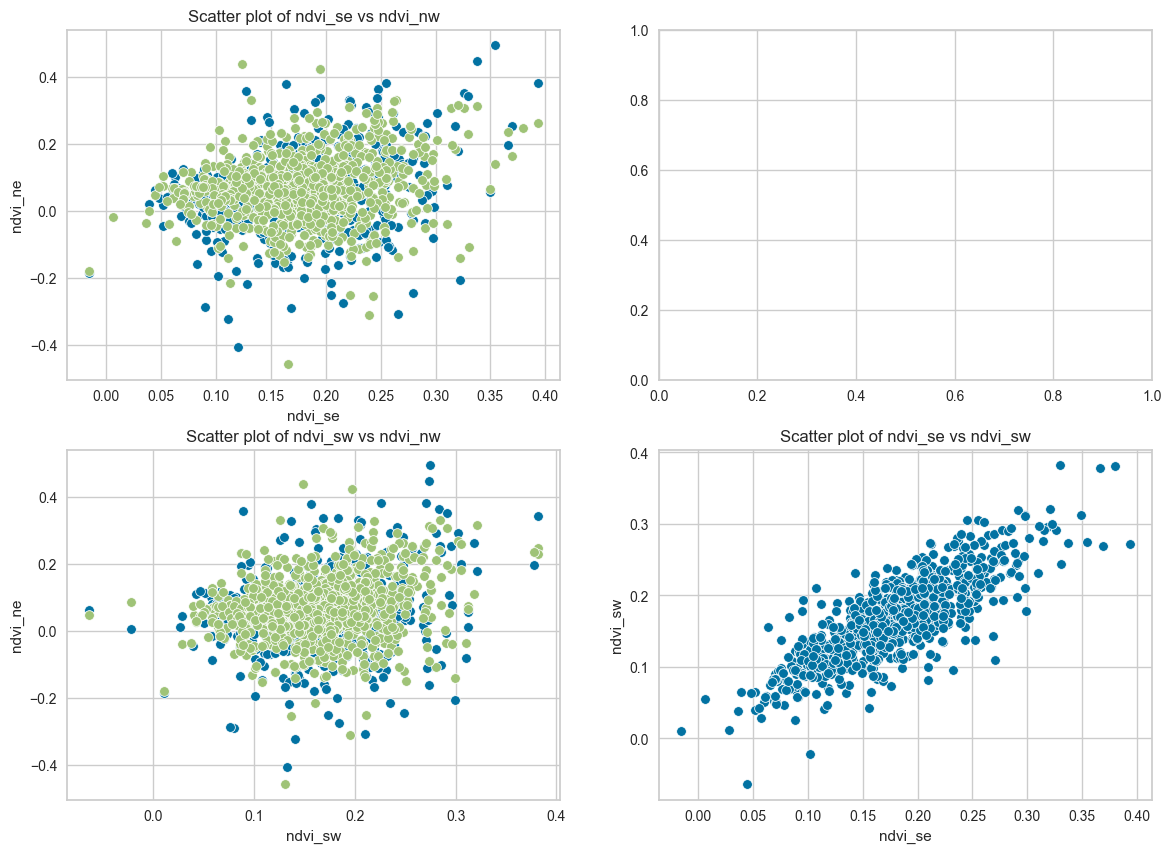

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

# Create a figure instance and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the array of axes
axs = axs.flatten()

# Loop over each pair of features and plot a scatter plot
for i in range(3):
    for j in range(i+1, 4):
        ax = axs[i*2 + j//2 - 1]
        sns.scatterplot(data=sj_train, x=features[i], y=features[j], ax=ax)
        ax.set_title(f'Scatter plot of {features[i]} vs {features[j]}')

# Adjust the layout
plt.tight_layout()
plt.show()

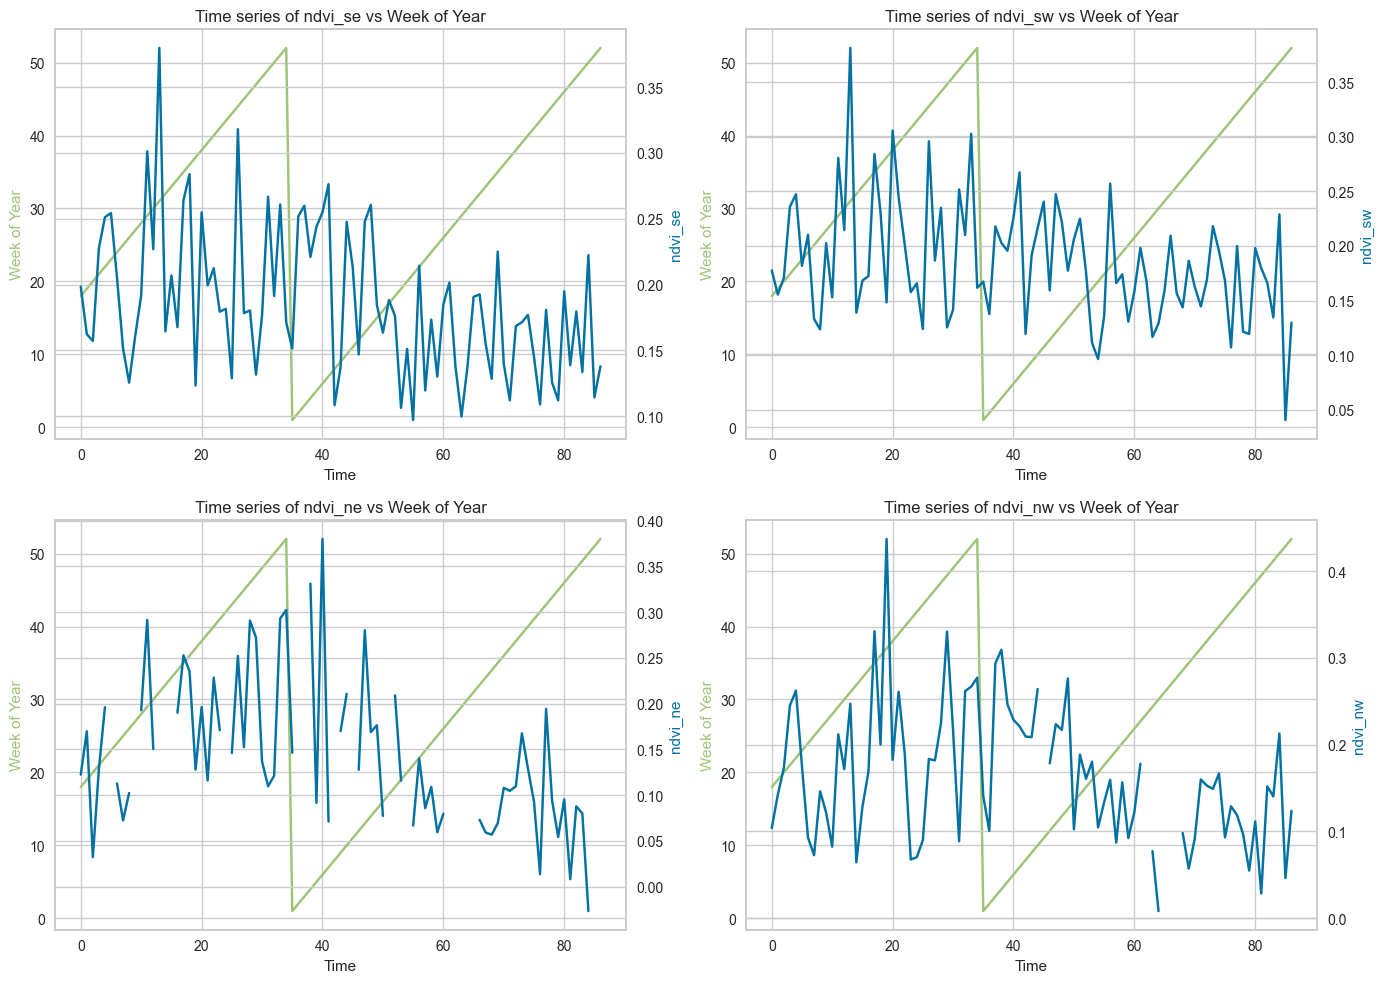

In [263]:
import matplotlib.pyplot as plt

sj_train_sub = sj_train.loc[(sj_train['year']<1992)==True,:]

# List of features
features = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

# Create a figure instance and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the array of axes
axs = axs.flatten()

# Loop over each feature and plot a time series against 'weekofyear'
for i, feature in enumerate(features):
    ax1 = axs[i]
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    # Plot 'weekofyear' on the first y-axis
    ax1.plot(sj_train_sub['weekofyear'], color='g')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Week of Year', color='g')

    # Plot the feature on the second y-axis
    ax2.plot(sj_train_sub[feature], color='b')
    ax2.set_ylabel(feature, color='b')

    # Set the title
    ax1.set_title(f'Time series of {feature} vs Week of Year')

# Adjust the layout
plt.tight_layout()
plt.show()

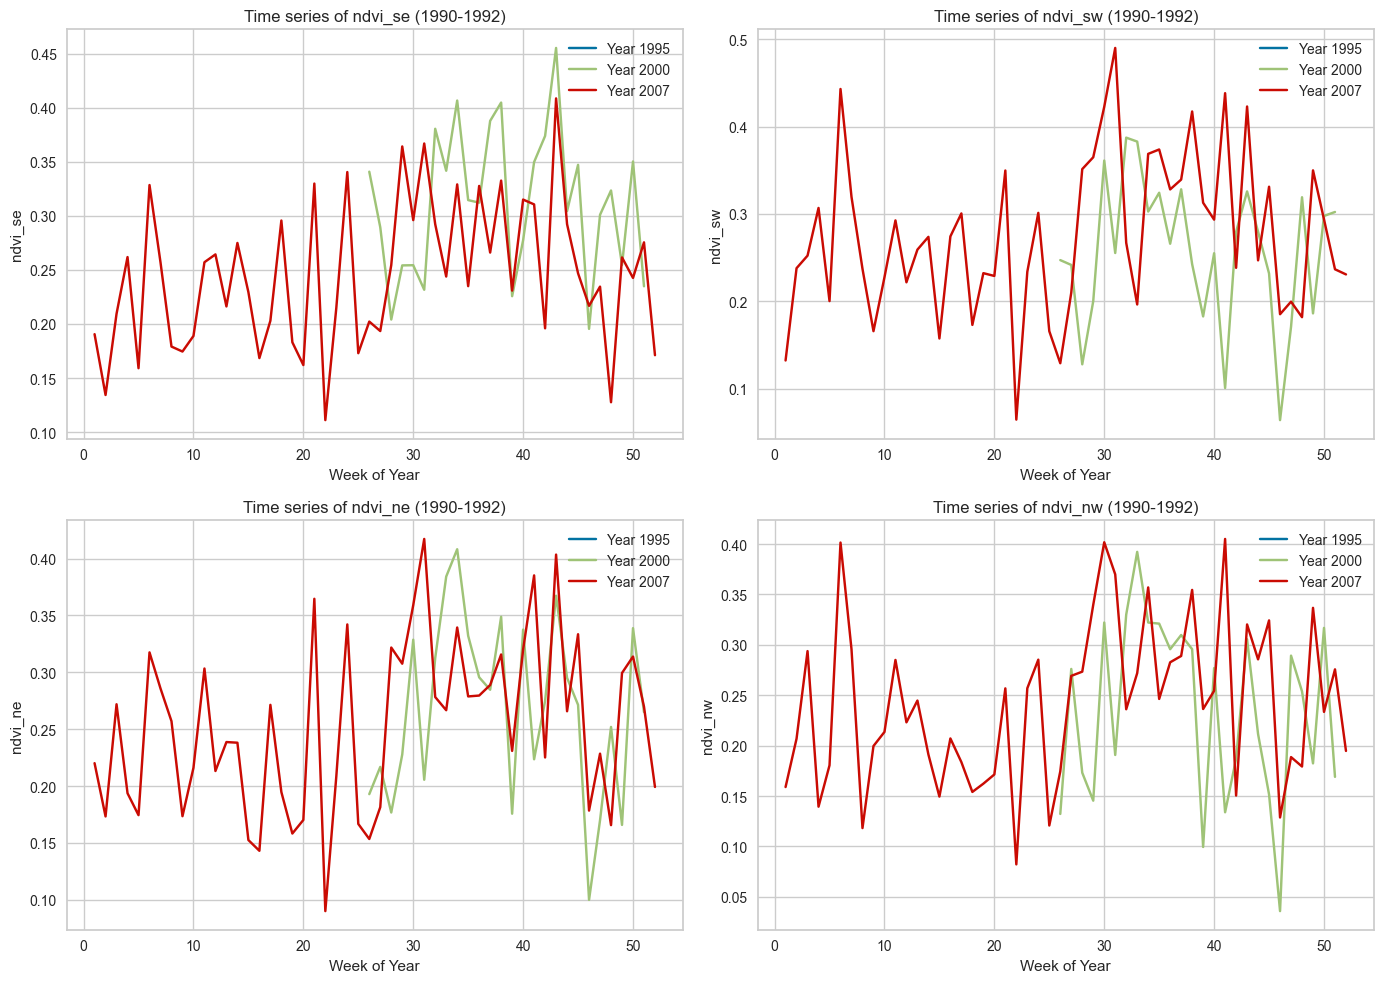

In [264]:
import matplotlib.pyplot as plt

# List of features
features = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

# List of years
years = [1995,2000,2007]

# Create a figure instance and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the array of axes
axs = axs.flatten()

# Loop over each feature and plot a line plot for each year against 'weekofyear'
for i, feature in enumerate(features):
    for year in years:
        # Filter the data for the current year
        data = iq_train_final[(iq_train_final['year'] == year)]

        # Plot the feature against 'weekofyear'
        axs[i].plot(data['weekofyear'], data[feature], label=f'Year {year}')

    # Set the labels and title
    axs[i].set_xlabel('Week of Year')
    axs[i].set_ylabel(feature)
    axs[i].set_title(f'Time series of {feature} (1990-1992)')
    axs[i].legend()

# Adjust the layout
plt.tight_layout()
plt.show()

In [265]:
sj_null_cols = ['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw']

In [266]:
for col in sj_null_cols:
    sj_train[col] = sj_train[col].interpolate(method='linear')

/var/folders/d7/z23sxpv11lv4f4ly5v7wgs580000gn/T/ipykernel_3049/3236238861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train[col] = sj_train[col].interpolate(method='linear')


In [267]:
sj_train.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     3
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             3
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

## Linear Interpolation for all NDVI values
3 missing precipitation values, removing them 

In [268]:
sj_train_final = sj_train.loc[sj_train["precipitation_amt_mm"].isna() == False,:]

In [269]:
sj_train_final.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

## Done with the filling the missing values
1. Normalizing the columns, based on skewness 
2. Scaling the values 

In [270]:
## Combing the dataset
train_com_final = pd.concat(objs=(iq_train_final,sj_train_final),axis=0)
train_com_final['week_start_date'] = pd.to_datetime(train_com_final['week_start_date'], 
 format = "%Y-%m-%d",
 errors = "coerce")

In [271]:
train_com_final.sort_values(by='week_start_date',inplace=True)

### Finding the skewness of data column values

In [273]:
## Finding the colums with a skewness value of more than +-0.5
## Hi
data_5 = train_com_final.copy()
skw_cols = []
skw_vals = []
for i in data_5.select_dtypes(np.number).columns:
    if(abs(stats.skew(data_5[i]))>0.5):
        print(f'Name: {i} \t Skew: {stats.skew(data_5[i])}')
        skw_cols.append(i)
        skw_vals.append(stats.skew(data_5[i]))

del(skw_cols[0:3])
del(skw_vals[0:3])

print(skw_cols)
print(skw_vals)

Name: ndvi_se 	 Skew: 0.5814630706050856
Name: ndvi_sw 	 Skew: 0.7579760923006029
Name: precipitation_amt_mm 	 Skew: 1.7358446650910841
Name: reanalysis_dew_point_temp_k 	 Skew: -0.7244380420851789
Name: reanalysis_max_air_temp_k 	 Skew: 0.8450732586825713
Name: reanalysis_min_air_temp_k 	 Skew: -0.6728064335780762
Name: reanalysis_precip_amt_kg_per_m2 	 Skew: 3.3770892779196013
Name: reanalysis_relative_humidity_percent 	 Skew: 0.5720119270227538
Name: reanalysis_sat_precip_amt_mm 	 Skew: 1.7358446650910841
Name: reanalysis_specific_humidity_g_per_kg 	 Skew: -0.5424120532761442
Name: reanalysis_tdtr_k 	 Skew: 1.0664588379139572
Name: station_avg_temp_c 	 Skew: -0.5839020692661842
Name: station_diur_temp_rng_c 	 Skew: 0.779332832611385
Name: station_precip_mm 	 Skew: 2.9781917096978305
Name: total_cases 	 Skew: 5.2730139778065075
['reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_per

<Axes: >

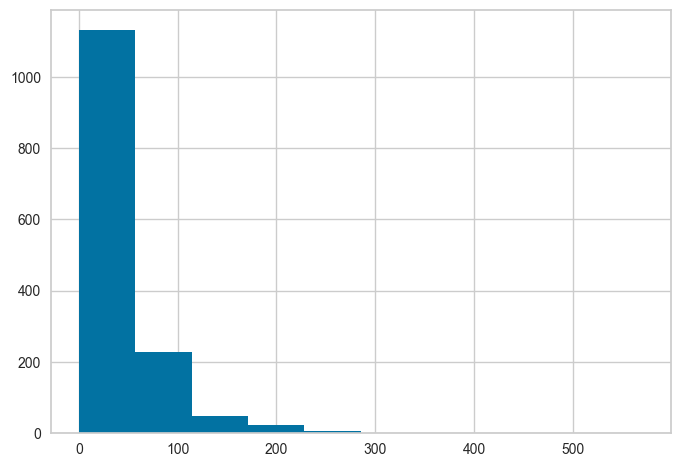

In [274]:
data_5['reanalysis_precip_amt_kg_per_m2'].hist()

In [316]:
data_5[skw_cols].describe()
zero_cols = ["precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm",
             "station_precip_mm","total_cases"]
non_zero_cols = [col for col in skw_cols if col not in zero_cols]

In [317]:
data_5.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [318]:
import seaborn as sns
skw_df = pd.DataFrame()
skw_df['Columns'],skw_df['Values'] = pd.DataFrame(skw_cols),pd.DataFrame(skw_vals)
skw_df.sort_values(by='Values',ascending=False)

,Columns,Values
11,total_cases,5.273014
3,reanalysis_precip_amt_kg_per_m2,3.377089
10,station_precip_mm,2.978192
5,reanalysis_sat_precip_amt_mm,1.735845
7,reanalysis_tdtr_k,1.066459
1,reanalysis_max_air_temp_k,0.845073
9,station_diur_temp_rng_c,0.779333
4,reanalysis_relative_humidity_percent,0.572012
6,reanalysis_specific_humidity_g_per_kg,-0.542412
8,station_avg_temp_c,-0.583902


In [319]:
"""
# Iterate over each column in the dataframe
for column in skw_df['Columns']:
    # Plot histogram
    data = data_5[column]
    sns.histplot(data=d, x=column)
    
    # Get skewness value
    skewness = skw_df.loc[skw_df['Columns'] == column, 'Values'].values[0]
    
    # Set title with skewness value
    plt.title(f"Skewness: {skewness}")
    
    # Show the plot
    plt.show()
    """

'\n# Iterate over each column in the dataframe\nfor column in skw_df[\'Columns\']:\n    # Plot histogram\n    data = data_5[column]\n    sns.histplot(data=d, x=column)\n    \n    # Get skewness value\n    skewness = skw_df.loc[skw_df[\'Columns\'] == column, \'Values\'].values[0]\n    \n    # Set title with skewness value\n    plt.title(f"Skewness: {skewness}")\n    \n    # Show the plot\n    plt.show()\n    '

In [320]:
###Applying the log transform in dataframe: 
a1 = 0
a2 = 0
data_6 = data_5.copy()
aft_skw = []
for i in skw_df['Columns']:
    bc = stats.skew(data_6[i])
    print(f'Before: {bc} skeness for {i}')
    if(i in zero_cols):
        data_6[i] = np.log1p(data_6[i]) 
    else: 
        data_6[i] = np.log(data_6[i]) 
    print(f'After:{stats.skew(data_6[i])} skeness for {i} \n')
    aft_skw.append(stats.skew(data_6[i]))

skw_df["skw_after"] = pd.Series(aft_skw)

n_ele = skw_df['Columns'].shape[0]
print(f"Before: {a1} ({({a1/n_ele})}) After: {a2} ({a2/n_ele}) Total: {n_ele}")



Before: -0.7244380420851789 skeness for reanalysis_dew_point_temp_k
After:-0.7351316261377837 skeness for reanalysis_dew_point_temp_k 

Before: 0.8450732586825713 skeness for reanalysis_max_air_temp_k
After:0.8277345325835438 skeness for reanalysis_max_air_temp_k 

Before: -0.6728064335780762 skeness for reanalysis_min_air_temp_k
After:-0.6903221111092226 skeness for reanalysis_min_air_temp_k 

Before: 3.3770892779196013 skeness for reanalysis_precip_amt_kg_per_m2
After:-0.45274964952608626 skeness for reanalysis_precip_amt_kg_per_m2 

Before: 0.5720119270227538 skeness for reanalysis_relative_humidity_percent
After:0.3894607110146345 skeness for reanalysis_relative_humidity_percent 

Before: 1.7358446650910841 skeness for reanalysis_sat_precip_amt_mm
After:-0.945652292900054 skeness for reanalysis_sat_precip_amt_mm 

Before: -0.5424120532761442 skeness for reanalysis_specific_humidity_g_per_kg
After:-0.7282603945282209 skeness for reanalysis_specific_humidity_g_per_kg 

Before: 1.0664

In [321]:
delta = []
## finding the percentage change
for _, row in skw_df.iterrows():
    delta.append((abs(row['skw_after'] - row['Values']) / abs(row['Values'])*100))

delta
skw_df["delta%"] = pd.DataFrame(delta)

In [323]:
skw_df.sort_values(by='Values',ascending=False).reset_index().drop('index',axis=1)

,Columns,Values,skw_after,delta%
0,total_cases,5.273014,-0.068309,101.295439
1,reanalysis_precip_amt_kg_per_m2,3.377089,-0.452750,113.406505
2,station_precip_mm,2.978192,-0.511065,117.160233
3,reanalysis_sat_precip_amt_mm,1.735845,-0.945652,154.477933
4,reanalysis_tdtr_k,1.066459,0.605428,43.230087
5,reanalysis_max_air_temp_k,0.845073,0.827735,2.051742
6,station_diur_temp_rng_c,0.779333,0.403347,48.244582
7,reanalysis_relative_humidity_percent,0.572012,0.389461,31.913883
8,reanalysis_specific_humidity_g_per_kg,-0.542412,-0.728260,34.263313
9,station_avg_temp_c,-0.583902,-0.700570,19.980682


In [343]:
skw_df.sort_values(by='delta%',ascending=False).reset_index().drop('index',axis=1)

,Columns,Values,skw_after,delta%
0,reanalysis_sat_precip_amt_mm,1.735845,-0.945652,154.477933
1,station_precip_mm,2.978192,-0.511065,117.160233
2,reanalysis_precip_amt_kg_per_m2,3.377089,-0.452750,113.406505
3,total_cases,5.273014,-0.068309,101.295439
4,station_diur_temp_rng_c,0.779333,0.403347,48.244582
5,reanalysis_tdtr_k,1.066459,0.605428,43.230087
6,reanalysis_specific_humidity_g_per_kg,-0.542412,-0.728260,34.263313
7,reanalysis_relative_humidity_percent,0.572012,0.389461,31.913883
8,station_avg_temp_c,-0.583902,-0.700570,19.980682
9,reanalysis_min_air_temp_k,-0.672806,-0.690322,2.603375


In [325]:
data_6.drop(columns=['week_start_date'],inplace=True)

In [326]:
data_7 = data_6.copy()
li = LabelEncoder()
data_7["city"]=li.fit_transform(data_7["city"])

In [327]:
data_7.isna().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

In [328]:
data_5.describe()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1442.000000,1442.000000,1442,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,2001.043689,26.553398,2001-07-15 16:44:36.282940416,0.131980,0.128117,0.203306,0.202343,45.750929,298.705166,299.229156,295.248855,303.433981,295.719764,40.206318,82.159305,45.750929,16.749091,4.908738,27.193419,8.121543,32.461720,22.102572,39.507571,24.622746
min,1990.000000,1.000000,1990-04-30 00:00:00,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,14.000000,1997-05-08 18:00:00,0.037413,0.048100,0.154193,0.144600,9.795000,297.660714,298.266071,294.120714,301.000000,293.900000,13.055000,77.177143,9.795000,15.561429,2.328571,26.332143,6.528571,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,27.000000,2002-05-31 12:00:00,0.115825,0.115579,0.195764,0.190757,38.320000,298.650000,299.292857,295.642143,302.400000,296.200000,27.295000,80.301429,38.320000,17.092143,2.857143,27.422500,7.364286,32.800000,22.200000,24.100000,12.000000
75%,2005.000000,39.000000,2005-12-01 06:00:00,0.231925,0.213868,0.248346,0.246914,70.242500,299.838571,300.207143,296.461071,305.500000,297.900000,52.425000,86.357857,70.242500,17.980714,7.639286,28.142857,9.750000,33.900000,23.300000,54.175000,28.000000
max,2010.000000,52.000000,2010-06-25 00:00:00,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000
std,5.396187,14.901164,NaN,0.137174,0.119468,0.073874,0.083621,43.729226,1.362684,1.261601,1.527893,3.234887,2.568453,43.475837,7.151183,43.729226,1.542392,3.549505,1.280308,2.146862,1.956852,1.573721,47.318132,43.727079


In [329]:
## Scaling the Data: 
scaler = StandardScaler()
data_7 = scaler.fit_transform(data_7)
data_7 = pd.DataFrame(data_7,columns=data_6.columns)

In [ ]:
scaler = StandardScaler()
data_7 = scaler.fit_transform(data_7)
data_7 = pd.DataFrame(data_7,columns=data_6.columns)

In [330]:
data_7

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0.745356,-2.047283,-0.574208,-0.068407,-0.204242,-0.065304,-0.295799,-0.762476,-0.831229,-1.178514,-1.858691,-1.130201,0.074311,0.229498,-1.280629,-0.300816,-1.826532,-0.604045,-1.367182,-0.517567,-1.565158,-1.336515,-0.181074,-0.717583
1,0.745356,-2.047283,-0.507076,0.276531,0.117713,-0.554496,-0.560551,-0.524566,-0.362453,-0.623471,-0.847120,-0.785034,0.268183,-0.312825,-0.659375,0.055873,-0.853847,-0.761536,-0.347916,-0.833996,-0.389393,0.061931,-0.633020,-0.570463
2,0.745356,-2.047283,-0.439944,-0.727290,0.375543,-0.624330,-0.376834,-0.256460,0.055984,-0.277985,0.123725,-0.910403,0.616330,0.037104,0.028059,0.304615,0.108697,-0.808323,-0.347916,-0.763410,-0.133792,0.443325,0.541735,-0.717583
3,0.745356,-2.047283,-0.372811,-0.024409,0.979260,0.328390,0.401269,-0.695221,0.206999,-0.000463,0.042541,-0.628557,0.500398,-0.547161,-0.219063,-0.177672,-0.001392,-0.725111,0.236262,-0.592247,0.428531,0.761154,-1.148929,-0.897642
4,0.745356,-2.047283,-0.305679,0.468325,1.122723,0.648544,0.538296,-0.874568,0.597121,0.345023,0.376391,-0.472340,0.693553,-0.665489,-0.201192,-0.583249,0.331578,-0.394580,1.326878,0.697934,1.297574,1.142548,-0.905746,-0.446075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,-1.341641,1.660324,-0.372811,1.537050,1.597491,0.718185,1.078713,0.218444,0.461837,1.222897,1.030290,1.931714,-0.470278,0.553910,0.947673,0.590595,1.082477,1.409096,1.102139,1.657451,1.502055,0.189062,0.213566,-0.570463
1438,-1.341641,1.660324,-0.305679,0.205480,0.270078,-0.910822,0.278905,0.931487,-0.275410,0.129802,0.787778,1.565827,-1.488562,2.028194,1.315238,0.864494,0.843631,0.994064,0.207256,1.149403,1.144214,-0.255898,0.446716,-0.243284
1439,-1.341641,1.660324,-0.238547,0.839204,0.150219,0.637130,0.375293,0.301712,-1.546452,-1.297452,0.167569,0.644848,-1.292035,0.666119,1.652480,0.629541,0.207948,0.999903,-2.241982,-0.517567,-0.133792,-1.845041,-0.738627,-1.456959
1440,-1.341641,1.660324,-0.171415,1.472615,0.985161,1.023442,1.473148,0.318412,-1.732075,-1.354089,0.051874,0.829766,-1.488562,0.866194,1.699521,0.637066,0.088199,1.073849,-1.375008,0.417951,-0.644994,-0.700858,-0.181074,-1.456959


In [ ]:
# setup(data=data_7,axis=1),target='total_cases')

In [332]:
# et	Extra Trees Regressor	0.3885	0.2572	0.5063	0.7312	0.2524	1.5861	0.6330
# xgboost	Extreme Gradient Boosting	0.3977	0.2715	0.5183	0.7161	0.2605	1.6816	0.5570
# rf	Random Forest Regressor	0.4072	0.2846	0.5324	0.7022	0.2621	1.7084	1.2640
# lightgbm	Light Gradient Boosting Machine	0.4132	0.2875	0.5353	0.6995	0.2625	1.6121	2.4510

#Along with the use of svm

In [344]:
et = ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
svm = SVR()

In [345]:
data_7

X_train = data_7.drop(["total_cases"],axis=1)
y_train = data_7['total_cases']

In [346]:
# Train the models
et.fit(X_train, y_train)
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
svm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4506
[LightGBM] [Info] Number of data points in the train set: 1442, number of used features: 23
[LightGBM] [Info] Start training from score 0.000000


SVR()

In [347]:
wt = [0.4,0.25,0.2,0.1,0.05]
sum(wt)

1.0

In [ ]:
final_predit_combine = (
    wt[0] * np.exp(et.predict(test_final)) +
    wt[1] * np.exp(xgb.predict(test_final)) +
    wt[2] * np.exp(rf.predict(test_final)) +
    wt[3] * np.exp(lgbm.predict(test_final)) + 
    wt[4] * np.exp(svm.predict(test_final)) 
)

### Target Trasformation

In [ ]:
log_target = np.log1p(labels_train["total_cases"])
# labels_train["total_cases"].describe()
stats.skew(log_target)
log_target.hist()

In [ ]:
print(data_7.shape,log_target.shape)

In [ ]:
# pd.concat([data_7,log_target],axis=1)

In [ ]:
sj_train.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the plot
sns.lineplot(x='week_start_date', y='total_cases', hue='city', data=dengue_train)

# Set the labels and title
plt.xlabel('Week')
plt.ylabel('Total Cases')
plt.title('Figure 1: Dengue Fever Cases by Week')

# Show the legend
plt.legend(title='City')

# Display the plot
plt.show()

In [ ]:
iq_training['week'] = iq_training['week_start_date'].dt.week

# Group by week and calculate the mean of total_cases
seasonality_data = iq_training.groupby('week')['total_cases'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the plot
sns.lineplot(x='week', y='total_cases', data=seasonality_data)

# Set the labels and title
plt.xlabel('Weeks')
plt.ylabel('Total Cases')
plt.title('Figure 5: Seasonality of Dengue Cases, Iquitos')

# Display the plot
plt.show()

In [ ]:
missing_mask = dengue_train_prelim.isnull()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(missing_mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
# plt.xlabel('Column Index', labelpad=10, fontsize=12, fontweight='bold')
# plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.show()

In [ ]:
dengue_train_prelim.isna().sum().sort_values(ascending=False)

In [ ]:
dengue_train_prelim.isna().sum(axis=1).value_counts()

In [ ]:
dengue_train_prelim.isna().sum(axis=1).value_counts()

missing_values_in_rows = dengue_train_prelim.isna().sum(axis=1)
indexes = missing_values_in_rows.sort_values(ascending=False) >= 16
train_1 = dengue_train_prelim.loc[indexes == False,:]
train_1.isna().sum(axis=1).sort_values(ascending=False).value_counts()

In [ ]:
train_1

In [ ]:
dengue_train_prelim.columns